In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os.path
import sys
import time

import tensorflow as tf


In [2]:
TRAIN_FILE = 'train.tfrecords'

In [63]:
def read_and_decode(filename_queue):
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    features = tf.parse_single_example(
      serialized_example,
      # Defaults are not specified since both keys are required.
      features={
          'image_raw': tf.FixedLenFeature([],tf.string),
          'age': tf.FixedLenFeature([], tf.int64),
          'gender':tf.FixedLenFeature([], tf.int64)
      })

    # Convert from a scalar string tensor (whose single string has
    # length mnist.IMAGE_PIXELS) to a uint8 tensor with shape
    # [mnist.IMAGE_PIXELS].
    image = tf.image.decode_jpeg(features['image_raw'], channels=3)
    image = tf.image.resize_images(image,[128,128])
    #image = tf.cast(image,tf.uint8)
    # image.set_shape([mnist.IMAGE_PIXELS])

    # OPTIONAL: Could reshape into a 28x28 image and apply distortions
    # here.  Since we are not applying any distortions in this
    # example, and the next step expects the image to be flattened
    # into a vector, we don't bother.

    # Convert from [0, 255] -> [-0.5, 0.5] floats.
    #image = tf.cast(image, tf.float32) * (1. / 255) - 0.5

    # Convert label from a scalar uint8 tensor to an int32 scalar.
    age = features['age']#tf.cast(features['age'], tf.int32)
    gender = tf.cast(features['gender'], tf.int32)

    return image, age, gender


In [64]:
def inputs(train, batch_size, num_epochs):
    """Reads input data num_epochs times.
    Args:
    train: Selects between the training (True) and validation (False) data.
    batch_size: Number of examples per returned batch.
    num_epochs: Number of times to read the input data, or 0/None to
       train forever.
    Returns:
    A tuple (images, labels), where:
    * images is a float tensor with shape [batch_size, mnist.IMAGE_PIXELS]
      in the range [-0.5, 0.5].
    * labels is an int32 tensor with shape [batch_size] with the true label,
      a number in the range [0, mnist.NUM_CLASSES).
    Note that an tf.train.QueueRunner is added to the graph, which
    must be run using e.g. tf.train.start_queue_runners().
    """
    if not num_epochs: num_epochs = None
    # filename = os.path.join(FLAGS.train_dir,
    #                       TRAIN_FILE if train else VALIDATION_FILE)

    with tf.name_scope('input'):
        filename_queue = tf.train.string_input_producer(
            [TRAIN_FILE], num_epochs=num_epochs)

        # Even when reading in multiple threads, share the filename
        # queue.
        image, age, gender = read_and_decode(filename_queue)

        # Shuffle the examples and collect them into batch_size batches.
        # (Internally uses a RandomShuffleQueue.)
        # We run this in two threads to avoid being a bottleneck.
        images, sparse_labels = tf.train.shuffle_batch(
            [image, age], batch_size=batch_size, num_threads=2,
            capacity=1000 + 3 * batch_size,
            # Ensures a minimum amount of shuffling of examples.
            min_after_dequeue=1000)

        return images, sparse_labels

In [65]:
def run_training():
  """Train MNIST for a number of steps."""

  # Tell TensorFlow that the model will be built into the default Graph.
  with tf.Graph().as_default():
    # Input images and labels.
    images, labels = inputs(train=True, batch_size=16,
                            num_epochs=1)

    # Build a Graph that computes predictions from the inference model.
    #logits = mnist.inference(images,
    #                         FLAGS.hidden1,
    #                         FLAGS.hidden2)

    # Add to the Graph the loss calculation.
    #loss = mnist.loss(logits, labels)

    # Add to the Graph operations that train the model.
    #train_op = mnist.training(loss, FLAGS.learning_rate)

    # The op for initializing the variables.
    init_op = tf.group(tf.global_variables_initializer(),
                       tf.local_variables_initializer())

    # Create a session for running operations in the Graph.
    sess = tf.Session()

    # Initialize the variables (the trained variables and the
    # epoch counter).
    sess.run(init_op)

    # Start input enqueue threads.
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)

    try:
      step = 0
      while not coord.should_stop():
        start_time = time.time()

        # Run one step of the model.  The return values are
        # the activations from the `train_op` (which is
        # discarded) and the `loss` op.  To inspect the values
        # of your ops or variables, you may include them in
        # the list passed to sess.run() and the value tensors
        # will be returned in the tuple from the call.
        #_, loss_value = sess.run([train_op, loss])
        images_val = sess.run([images])
        print(images_val.shape)
        duration = time.time() - start_time

        # Print an overview fairly often.
        #if step % 100 == 0:
        #  print('Step %d: loss = %.2f (%.3f sec)' % (step, loss_value,
        #                                             duration))
        step += 1
    except tf.errors.OutOfRangeError:
      print('Done training for %d epochs, %d steps.' % (1, step))
    finally:
      # When done, ask the threads to stop.
      coord.request_stop()

    # Wait for threads to finish.
    coord.join(threads)
    sess.close()

In [66]:
    images, labels = inputs(train=True, batch_size=16,
                            num_epochs=1)

    # Build a Graph that computes predictions from the inference model.
    #logits = mnist.inference(images,
    #                         FLAGS.hidden1,
    #                         FLAGS.hidden2)

    # Add to the Graph the loss calculation.
    #loss = mnist.loss(logits, labels)

    # Add to the Graph operations that train the model.
    #train_op = mnist.training(loss, FLAGS.learning_rate)

    # The op for initializing the variables.
    init_op = tf.group(tf.global_variables_initializer(),
                       tf.local_variables_initializer())

    # Create a session for running operations in the Graph.
    sess = tf.Session()

    # Initialize the variables (the trained variables and the
    # epoch counter).
    sess.run(init_op)

    # Start input enqueue threads.
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)

In [69]:
images_val,age_val = sess.run([images,labels])

In [76]:
images_val[0].shape

(128, 128, 3)

In [71]:
import matplotlib.pyplot as plt

In [90]:
plt.imshow(images_val[6]/255.0)

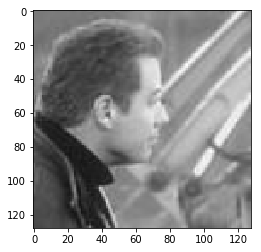

In [91]:
plt.show()

In [18]:
sess.close()

INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.CancelledError'>, Enqueue operation was cancelled
	 [[Node: input/shuffle_batch/random_shuffle_queue_enqueue = QueueEnqueueV2[Tcomponents=[DT_UINT8, DT_INT32], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](input/shuffle_batch/random_shuffle_queue, input/Cast/_15, input/Cast_1/_17)]]
